<a href="https://colab.research.google.com/github/summerolmstead/Wine-Quality-Exploration/blob/main/Wine_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summer Olmstead

Assignment 2 | Dataset 2 - 5 attributes

Wine Dataset

# Importing Data from Kaggle

https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [11]:
import kagglehub

path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [12]:
import os

dataset_files = os.listdir(path)
print("Dataset files:", dataset_files)

Dataset files: ['WineQT.csv']


In [13]:
import pandas as pd

csv_file_path = os.path.join(path, 'WineQT.csv')
df = pd.read_csv(csv_file_path)

print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [14]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [15]:
print(df['pH'].describe())

count    1143.000000
mean        3.311015
std         0.156664
min         2.740000
25%         3.205000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64


# Data Preprocessing

In [16]:
# check for missing values!
print(df.isnull().sum())

# remove the 'Id' column as it is not needed for visualization more so just need attributes
df = df.drop(columns=['Id'])

# check for duplicates and remove them just in case
df = df.drop_duplicates()

# drop rows that contain NaN values! adding statement because it came up later and fixed it here
df = df.dropna()

# drop rows where any value is 0 (except for 'quality' since 0 can be a valid value for it)
df = df[(df != 0).all(axis=1)]

# double check that all data types are correct
print(df.dtypes)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


# Data Analysis

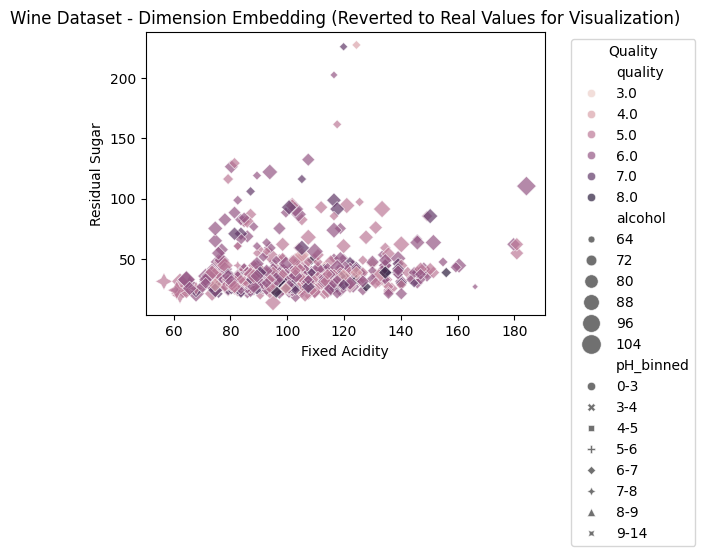

In [17]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# select the relevant columns for visualization - i liked these the most!
df_selected = df[['fixed acidity', 'residual sugar', 'alcohol', 'quality', 'pH']]

# initialize and fit the MinMaxScaler on the original data (before scaling)
scaler = MinMaxScaler()
scaler.fit(df[['fixed acidity', 'residual sugar', 'alcohol', 'pH']])  #fit scaler on original features

#inverse transform the scaled data (only for visualization so its easier to make sense for people unaware of normalizes scale in graphs)
df_original = pd.DataFrame(scaler.inverse_transform(df[['fixed acidity', 'residual sugar', 'alcohol', 'pH']]),
                           columns=['fixed acidity', 'residual sugar', 'alcohol', 'pH'])

# adding back 'quality' column without transformation (it was not scaled bc didnt make sense to)
df_original['quality'] = df['quality']

# want to bin the pH values into 5 discrete categories for shape assignment because too many shapes if dont
bins = [0, 3, 4, 5, 6, 7, 8, 9, 14] # chose these because its easier and makes more sense as wines are unlikely too be too basic or acidic
labels = ['0-3', '3-4', '4-5', '5-6', '6-7','7-8','8-9','9-14']  # These are the bin labels
df_original['pH_binned'] = pd.cut(df_original['pH'], bins=bins, labels=labels, right=False)

#visualizing the data with the inverse-transformed values
sns.scatterplot(
    x='fixed acidity', y='residual sugar',
    hue='quality',  # color by quality
    size='alcohol',  #size by alcohol content
    style='pH_binned',  # shape by binned pH
    data=df_original,  # inverse-transformed data for visualization
    sizes=(20, 200),
    alpha=0.7
)

#the title and labels
plt.title("Wine Dataset - Dimension Embedding (Reverted to Real Values for Visualization)")
plt.xlabel("Fixed Acidity")
plt.ylabel("Residual Sugar")
plt.legend(title='Quality', bbox_to_anchor=(1.05, 1), loc='upper left') #move the legend outside the plot for better clarity
plt.tight_layout() # tight layout avoids overlapping
plt.show()


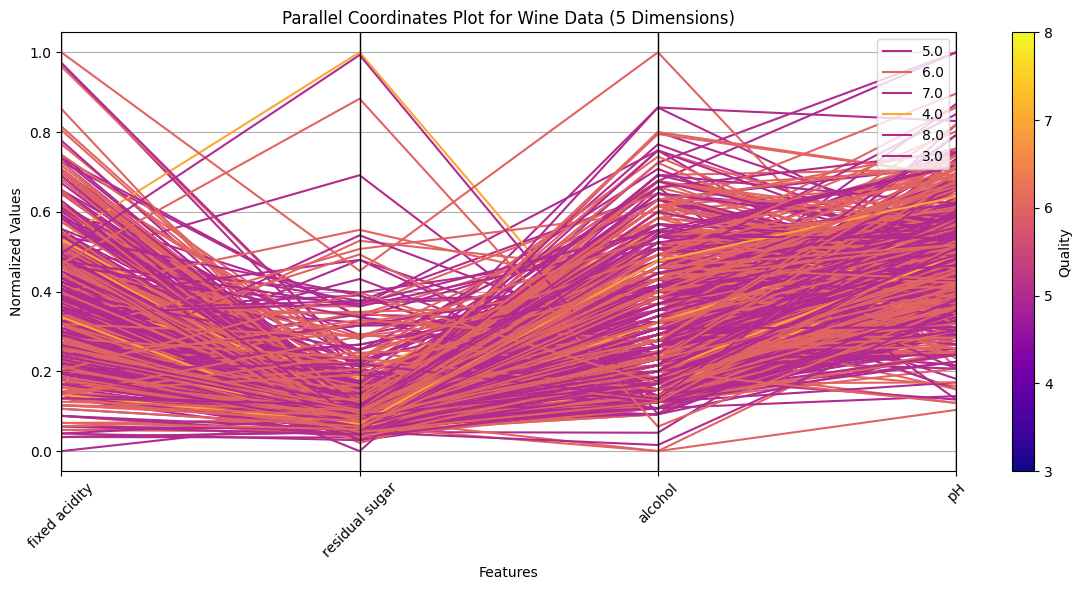

In [24]:
from pandas.plotting import parallel_coordinates
from matplotlib import cm

# reselect the relevant columns for visualization
df_selected2 = df[['fixed acidity', 'residual sugar', 'alcohol', 'quality', 'pH']]
# normalize the data to ensure that all features are on the same scale besides quality again
scaler2 = MinMaxScaler()
df_scaled = pd.DataFrame(scaler2.fit_transform(df_selected2[['fixed acidity', 'residual sugar', 'alcohol', 'pH']]),
                         columns=['fixed acidity', 'residual sugar', 'alcohol', 'pH'])

#adding back for color grouping unscaled
df_scaled['quality'] = df_selected['quality']
# drop rows that contain NaN values after scaling despite getting rid of before
df_scaled = df_scaled.dropna()
# create a parallel coordinates plot with the updated colormap
plt.figure(figsize=(12, 6))
norm = plt.Normalize(vmin=df_scaled['quality'].min(), vmax=df_scaled['quality'].max()) #normalize now for color map
colors = cm.plasma(norm(df_scaled['quality']))  # Normalize quality for colormap
# plot using parallel coordinates!!
parallel_coordinates(df_scaled, 'quality', color=colors)
plt.title("Parallel Coordinates Plot for Wine Data (5 Dimensions)")
plt.xlabel("Features")
plt.ylabel("Normalized Values")
plt.xticks(rotation=45)  #rotate feature labels for readability
sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)  #use 'plasma' colormap because it resembles wine a little
sm.set_array([])  # empty array, just needed for colorbar....
#specify the axis for the colorbar
cbar = plt.colorbar(sm, ax=plt.gca())  # using plt.gca() for the current axis to avoid error
cbar.set_label('Quality')
plt.tight_layout()
plt.show()